In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import scipy.stats

## 1. Encoder self-attention

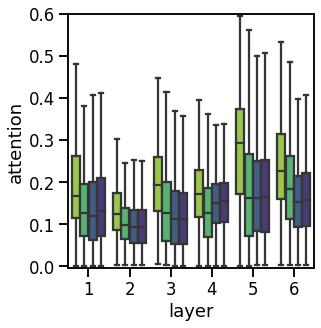

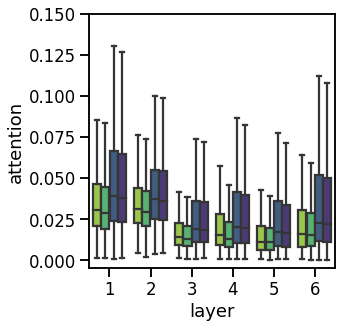

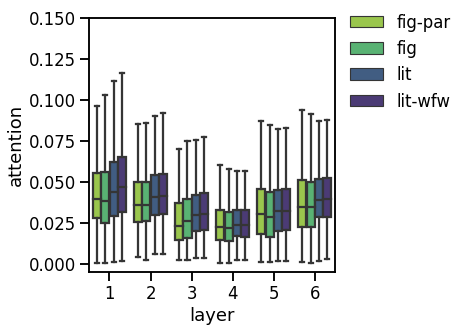

In [19]:
sns.set_context("talk")
sns.set_style({'legend.frameon': False})
colors = sns.color_palette("viridis", 6)
per_setup = pickle.load(open("data/attention.pickle", 'rb'))
setups = [("figurative", "paraphrase"), "figurative", "literal", ("literal", "word-by-word")]
labels = ["fig-par", "fig", "lit", "lit-wfw"]

for graph, maxi in [("idi2idi", 0.6), ("idi2con", 0.15), ("con2idi", 0.15)]:
    fig = plt.figure(figsize=(4.5, 4.5))
    data, layers, hue = [], [], []

    for i, setup in enumerate(setups):
        data.extend([x for l in range(6) for x in per_setup[("NOUN", 10)][l][graph][setup]])
        layers.extend([l for l in range(6) for x in per_setup[("NOUN", 10)][l][graph][setup]])
        hue.extend([labels[i] for l in range(6) for x in per_setup[("NOUN", 10)][l][graph][setup]])

    ax = sns.boxplot(x=layers, y=data, hue=hue,
                     palette=[colors[-1], colors[-2], colors[1], colors[0]],
                     fliersize=0)

    plt.tight_layout()
    if graph == "con2idi":
        plt.legend(bbox_to_anchor=(1, 1.075), frameon=False)
    else:
        plt.legend([],[], frameon=False)
    ax.set_xticks([0, 1, 2, 3, 4, 5])
    ax.set_xticklabels([1, 2, 3, 4, 5, 6])
    plt.xlabel("layer")
    plt.ylabel("attention")
    plt.ylim(-0.005, maxi)
    plt.savefig(f"figures/attention_{graph}.pdf", bbox_inches="tight")
    plt.show()

## 2. Cross-attention

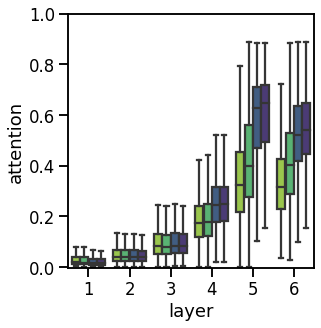

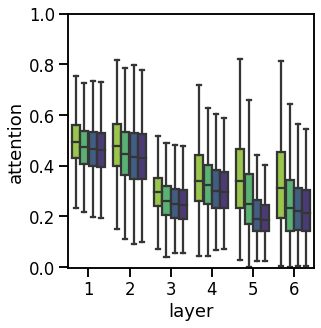

In [20]:
sns.set_context("talk")
sns.set_style({'legend.frameon': False})
colors = sns.color_palette("viridis", 6)
per_setup = pickle.load(open("data/cross_attention.pickle", 'rb'))

for graph, maxi in [("idi2idi", 1), ("idi2eos", 1)]:
    fig = plt.figure(figsize=(4.5, 4.5))
    data, layers, hue = [], [], []
    for i, setup in enumerate(setups):
        data.extend([x for l in range(6) for x in per_setup[("NOUN", 10)][l][graph][setup]])
        layers.extend([l for l in range(6) for x in per_setup[("NOUN", 10)][l][graph][setup]])
        hue.extend([labels[i] for l in range(6) for x in per_setup[("NOUN", 10)][l][graph][setup]])

    ax = sns.boxplot(x=layers, y=data, hue=hue,
                     palette=[colors[-1], colors[-2], colors[1], colors[0]],
                     fliersize=0)
    plt.tight_layout()
    plt.legend([],[], frameon=False)
    ax.set_xticks([0, 1, 2, 3, 4, 5])
    ax.set_xticklabels([1, 2, 3, 4, 5, 6])
    plt.xlabel("layer")
    plt.ylabel("attention")
    plt.ylim(-0.005, maxi)
    plt.savefig(f"figures/cross_attention_{graph}.pdf", bbox_inches="tight")
    plt.show()

## 3. Comparison to WSD

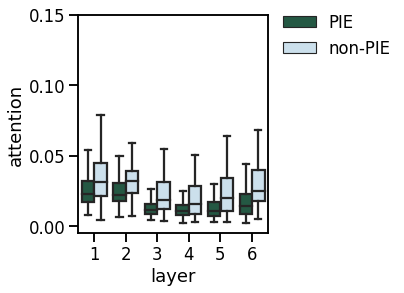

In [2]:
per_setup = pickle.load(open("data/attention_wsd_comparison.pickle", 'rb'))
sns.set_context("talk")
sns.set_style({'legend.frameon': False})
colors = sns.color_palette("cubehelix", 6)

fig = plt.figure(figsize=(4, 4))
data, layers, hue = [], [], []
data.extend([x for l in range(6) for x in per_setup[l]["attention, pie"]])
layers.extend([l for l in range(6) for x in per_setup[l]["attention, pie"]])
hue.extend(["PIE" for l in range(6) for x in per_setup[l]["attention, pie"]])
data.extend([x for l in range(6) for x in per_setup[l]["attention, non_pie"]])
layers.extend([l for l in range(6) for x in per_setup[l]["attention, non_pie"]])
hue.extend(["non-PIE" for l in range(6) for x in per_setup[l]["attention, non_pie"]])

ax = sns.boxplot(x=layers, y=data, hue=hue, palette=[colors[1], colors[-1]], fliersize=0)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1.075), frameon=False)
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels([1, 2, 3, 4, 5, 6])
plt.xlabel("layer")
plt.ylabel("attention")
plt.ylim(-0.005, 0.15)
plt.savefig(f"figures/attention_pie_non-pie.pdf", bbox_inches="tight")
plt.show()

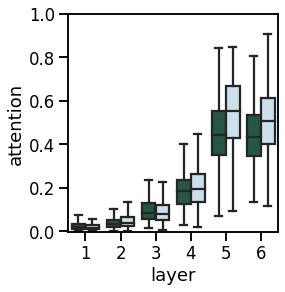

In [9]:
per_setup = pickle.load(open("cross_attention_pie_non-pie.pickle", 'rb'))
fig = plt.figure(figsize=(4, 4))
data, layers, hue = [], [], []
data.extend([x for l in range(6) for x in per_setup[l]["cross-attention, pie"]])
layers.extend([l for l in range(6) for x in per_setup[l]["cross-attention, pie"]])
hue.extend(["PIE" for l in range(6) for x in per_setup[l]["cross-attention, pie"]])
data.extend([x for l in range(6) for x in per_setup[l]["cross-attention, non_pie"]])
layers.extend([l for l in range(6) for x in per_setup[l]["cross-attention, non_pie"]])
hue.extend(["non-PIE" for l in range(6) for x in per_setup[l]["cross-attention, non_pie"]])

ax = sns.boxplot(x=layers, y=data, hue=hue, palette=[colors[1], colors[-1]], fliersize=0)
plt.tight_layout()
plt.legend([],[], frameon=False)
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels([1, 2, 3, 4, 5, 6])
plt.xlabel("layer")
plt.ylabel("attention")
plt.ylim(-0.005, 1)
plt.savefig(f"figures/cross_attention_pie_non-pie.pdf", bbox_inches="tight")
plt.show()

## 4. Attention for idiom norms

In [44]:
for sem_property in ["familiarity", "meaningfulness", "literal_plausibility", "predictability", "decomposability"]:
    per_idiom = pickle.load(open("attention_per_norm_idioms.pickle", 'rb'))
    for l in range(6):
        familiarity, norm_idioms, diff = [], [], []
        with open(f"../data/{sem_property}.tsv", encoding="utf-8") as f:
            f.readline()
            for line in f:
                idiom = line.split("\t")[0]
                if idiom not in per_idiom:
                    continue
                data = [x for x in per_idiom[idiom][l]["idi2idi"]["figurative"]]
                fig = np.nanmean(data)
                if not math.isnan(fig):
                    norm_idioms.append(idiom)
                    familiarity.append(float(line.split("\t")[3]))
                    diff.append(fig)

        familiarity, diff = zip(*sorted(list(zip(familiarity, diff))))
        print(sem_property, l, scipy.stats.pearsonr(familiarity, diff))

c:\users\gebruiker\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':


familiarity 0 (0.19907365632613594, 0.0010506513455913423)
familiarity 1 (0.1865900265298709, 0.002159911376647459)
familiarity 2 (0.2160638629312147, 0.0003669773118054445)
familiarity 3 (0.2825023224501834, 2.61164258497194e-06)
familiarity 4 (0.25548193290882326, 2.302525674300246e-05)
familiarity 5 (0.19574684547564516, 0.0012785588896246267)
meaningfulness 0 (0.10676482483965556, 0.08104830602397892)
meaningfulness 1 (0.10642332053430428, 0.0820306788720234)
meaningfulness 2 (0.10604538076108859, 0.08312903244514071)
meaningfulness 3 (0.16752459554774324, 0.005975342241565548)
meaningfulness 4 (0.14686442729982702, 0.016123973051984375)
meaningfulness 5 (0.1114719466909868, 0.06845087371017076)
literal_plausibility 0 (-0.010329454745370182, 0.8663358360076645)
literal_plausibility 1 (-0.09719078257047079, 0.11242098269448346)
literal_plausibility 2 (-0.03924952890056528, 0.5223119423291583)
literal_plausibility 3 (0.06723045656562401, 0.2727695842090354)
literal_plausibility 4 (-0

In [52]:
for sem_property in ["familiarity", "meaningfulness", "literal_plausibility", "predictability", "decomposability"]:
    per_idiom = pickle.load(open("cross_attention_per_norm_idioms.pickle", 'rb'))
    for l in range(6):
        familiarity, norm_idioms, diff = [], [], []
        with open(f"../data/{sem_property}.tsv", encoding="utf-8") as f:
            f.readline()
            for line in f:
                idiom = line.split("\t")[0]
                if idiom not in per_idiom:
                    continue
                data = [x for x in per_idiom[idiom][l]["idi2idi"][("figurative", "paraphrase")] if not math.isnan(x)]
                familiarity.extend([float(line.split("\t")[3])] * len(data))
                diff.extend(data)

        familiarity, diff = zip(*sorted(list(zip(familiarity, diff))))
        # sns.regplot(x=list(familiarity), y=list(diff))
        print(sem_property, l, scipy.stats.pearsonr(familiarity, diff))

familiarity 0 (-0.29999595996894657, 5.0180681960647006e-15)
familiarity 1 (0.07292751076528042, 0.06273603355375384)
familiarity 2 (-0.2903968883860326, 3.894806165938628e-14)
familiarity 3 (-0.05529964930397034, 0.15841948728999494)
familiarity 4 (-0.070271031107472, 0.07295774659261758)
familiarity 5 (-0.04658937501520961, 0.2348377245915087)
meaningfulness 0 (-0.31776924867657147, 9.18180191838887e-17)
meaningfulness 1 (0.05506761205913303, 0.16017593491212065)
meaningfulness 2 (-0.28594917851224366, 9.807216511248048e-14)
meaningfulness 3 (-0.0366898510041759, 0.3495994160335959)
meaningfulness 4 (-0.05690461232899978, 0.14666656707301814)
meaningfulness 5 (-0.016257372806896608, 0.6786168461029738)
literal_plausibility 0 (0.19373565735281478, 6.2054107803422e-07)
literal_plausibility 1 (0.09579458847604592, 0.014405771897348275)
literal_plausibility 2 (0.21374800546017952, 3.562969646192146e-08)
literal_plausibility 3 (0.038791346730790856, 0.32267237875829435)
literal_plausibili